In [18]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import io
import requests
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_excel('Data_Train.xlsx')

In [20]:
df.head(5)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [17]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

<Figure size 720x720 with 0 Axes>

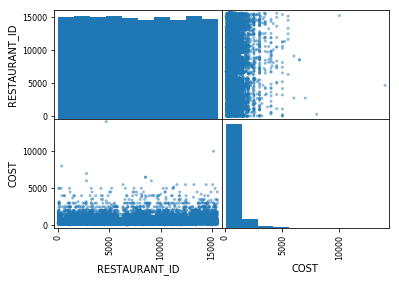

In [5]:
plt.figure(figsize=(10, 10))
scatter_matrix(df)
plt.show()

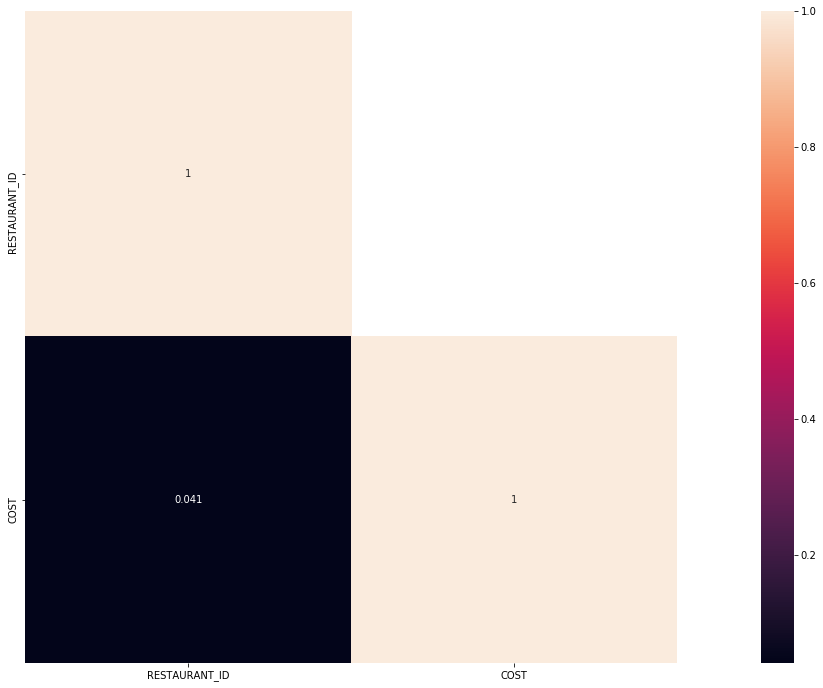

In [6]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

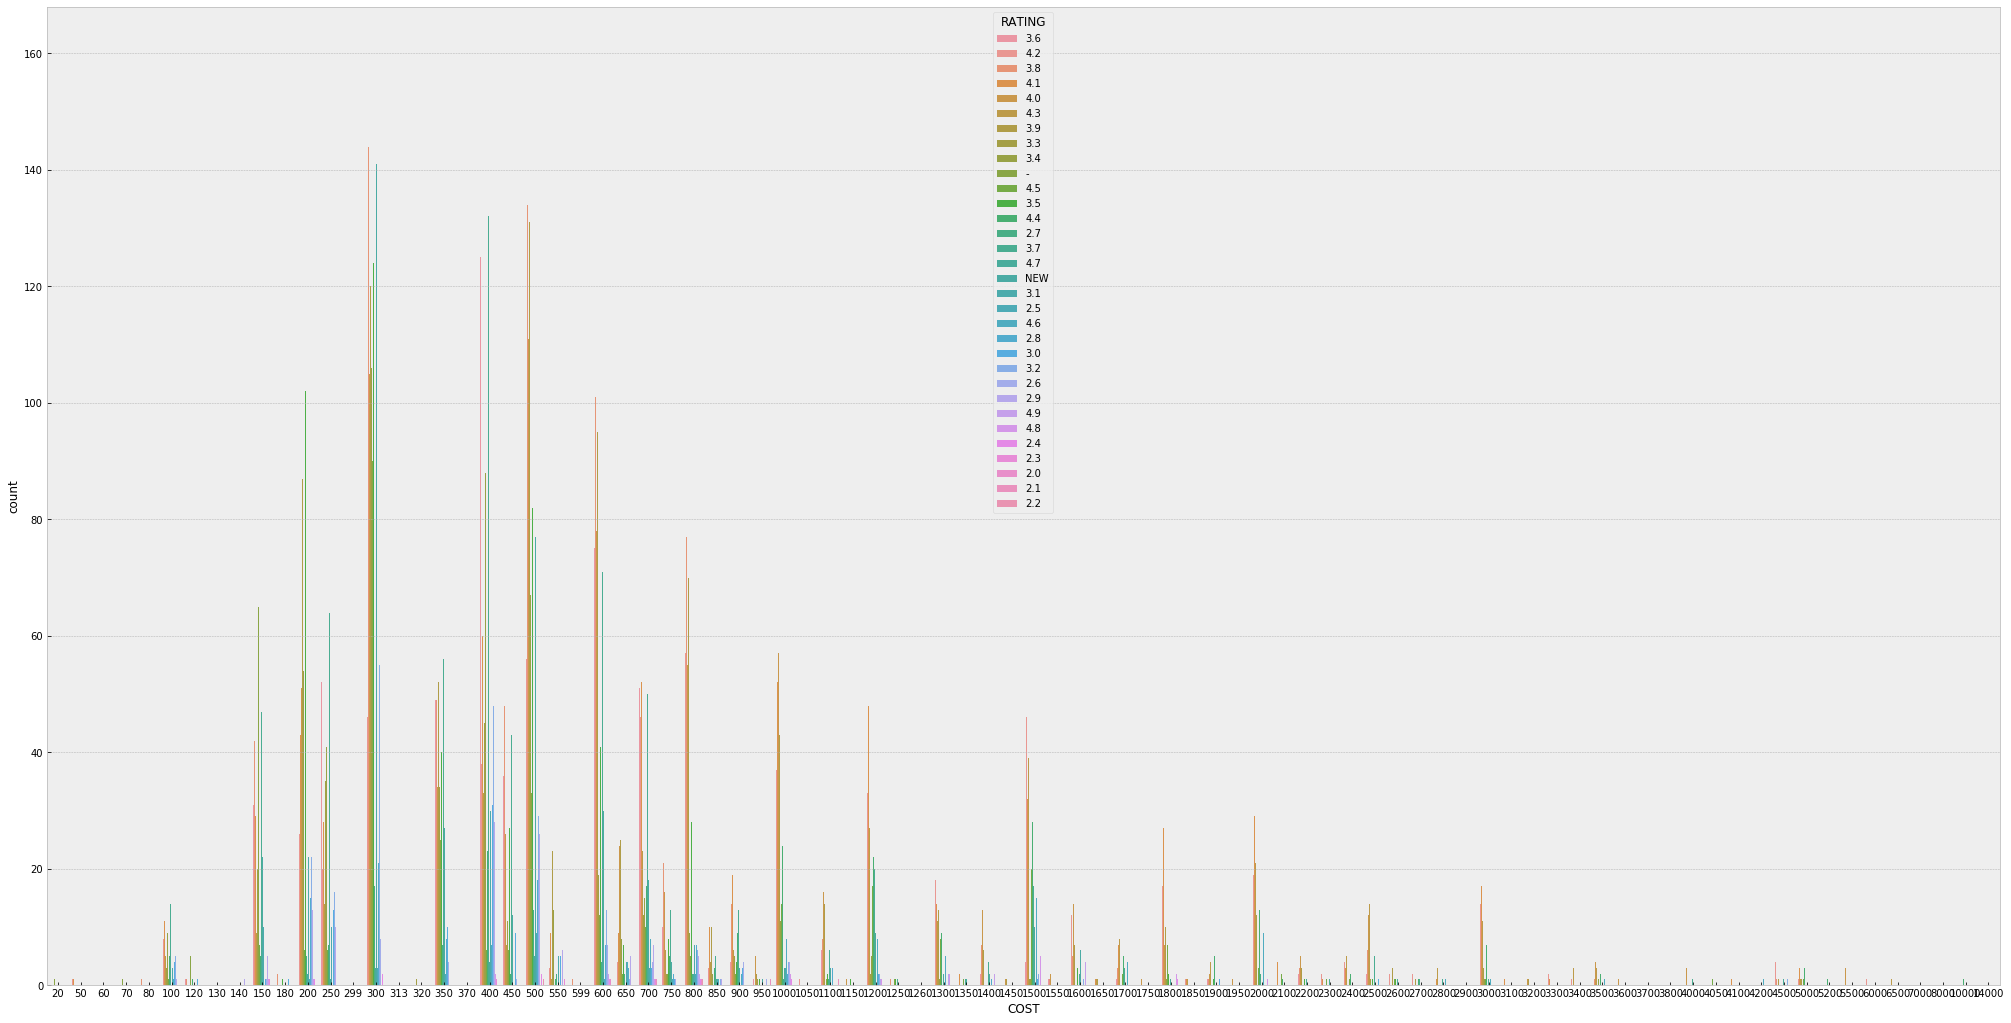

In [7]:
plt.figure(figsize=(35, 18))
plt.style.use('bmh')

sns.countplot(x='COST', hue='RATING', data=df)

AxesSubplot(0.125,0.125;0.775x0.755)


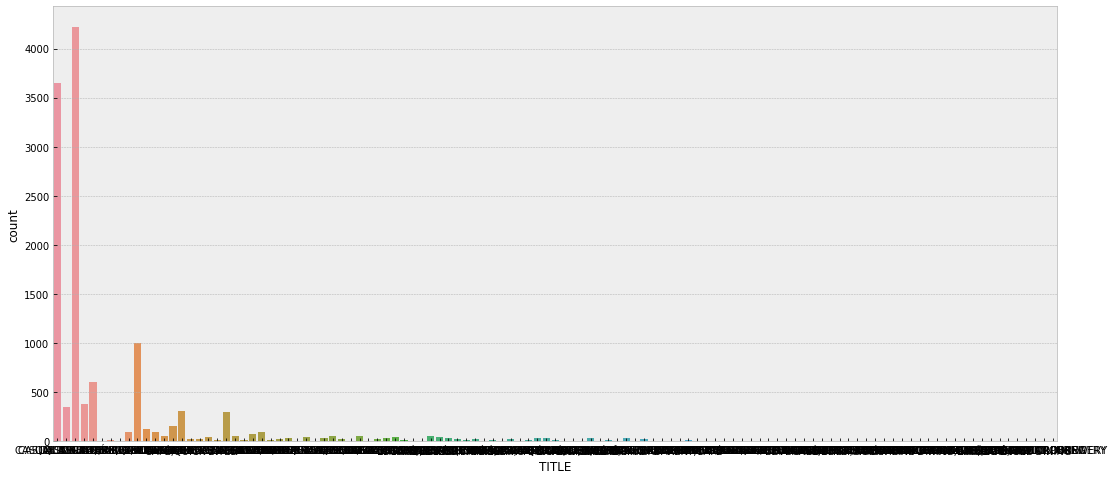

In [8]:
plt.figure(figsize=(18,8))
print(sns.countplot(df['TITLE']))

AxesSubplot(0.125,0.125;0.775x0.755)


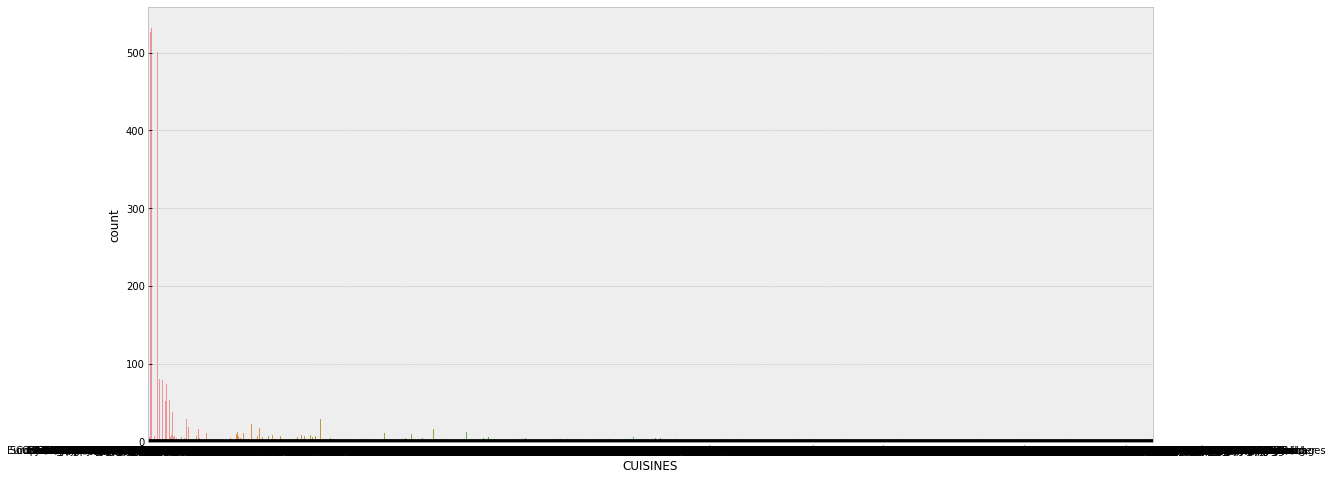

In [9]:
plt.figure(figsize=(18,8))
print(sns.countplot(df['CUISINES']))

AxesSubplot(0.125,0.125;0.775x0.755)


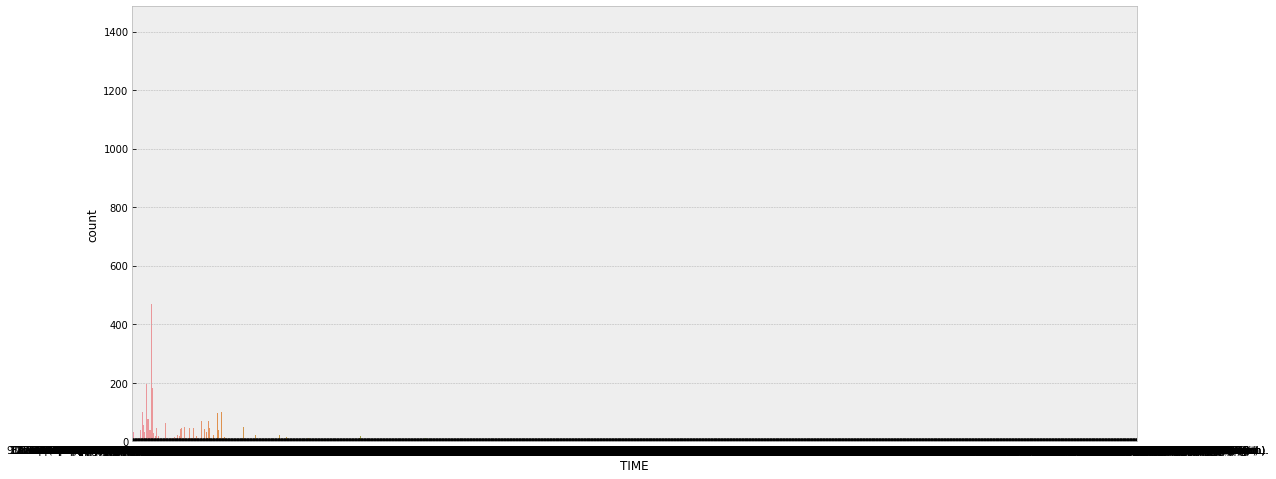

In [15]:
plt.figure(figsize=(18,8))
print(sns.countplot(df['TIME']))

In [48]:
df['Location']=df['CITY']+' '+df['LOCALITY']
df.drop(columns=['CITY','LOCALITY'])

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,Location
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49 votes,1200,Thane Dombivali East
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),4.2,30 votes,1500,Chennai Ramapuram
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221 votes,800,Chennai Saligramam
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),4.1,24 votes,800,Mumbai Bandra West
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),3.8,165 votes,300,Mumbai Lower Parel
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),4.0,550 votes,800,Mumbai Vile Parle West
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",4.1,509 votes,600,Bangalore Koramangala 6th Block
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),4.3,1612 votes,1600,Gurgaon Sector 29
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),3.9,101 votes,300,Bangalore Bannerghatta Road
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",3.3,219 votes,200,Hyderabad Dilsukhnagar


AxesSubplot(0.125,0.125;0.775x0.755)


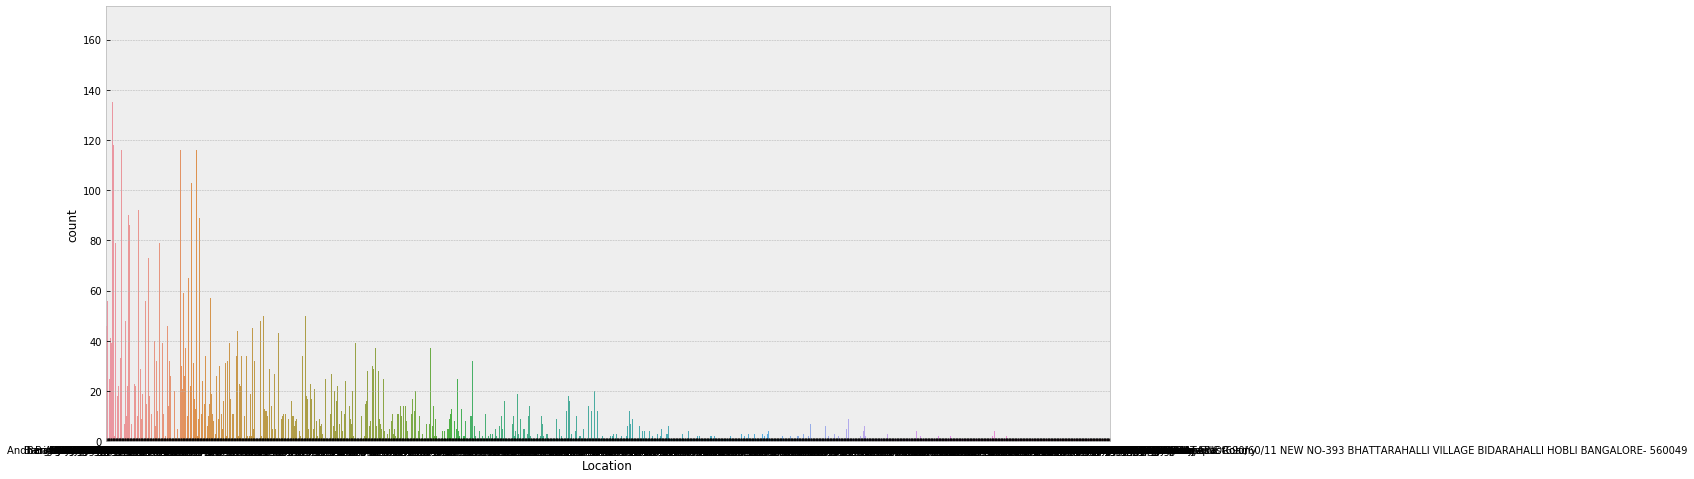

In [17]:
plt.figure(figsize=(18,8))
print(sns.countplot(df['Location']))

In [49]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
Location          113
dtype: int64

In [21]:
df=df.drop(['CITY','LOCALITY','VOTES'],axis=1)

In [22]:
df.isnull().sum()
df.shape
df = df.dropna()

In [23]:
array = df.values
X = array[:,0:-2]
Y = array[:,-1]

In [24]:
#df = df.apply(pd.to_numeric, errors='coerce')

In [25]:
from sklearn.preprocessing import LabelEncoder

df1= list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(df1):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,COST
0,31,9438,2627,739,17,1200
1,33,13198,289,1885,23,1500
2,31,10915,2976,661,19,800
3,95,6346,4130,275,22,800
4,50,15387,1766,615,19,300


In [26]:
from sklearn.utils import shuffle
df = shuffle(df)

# Splitting the data set into train and test set
from sklearn.model_selection import train_test_split

features_ = df.drop(columns = ['COST'])
target = df['COST']
X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.3,random_state = 0)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (8881, 5)
Test data set size :  (3807, 5)


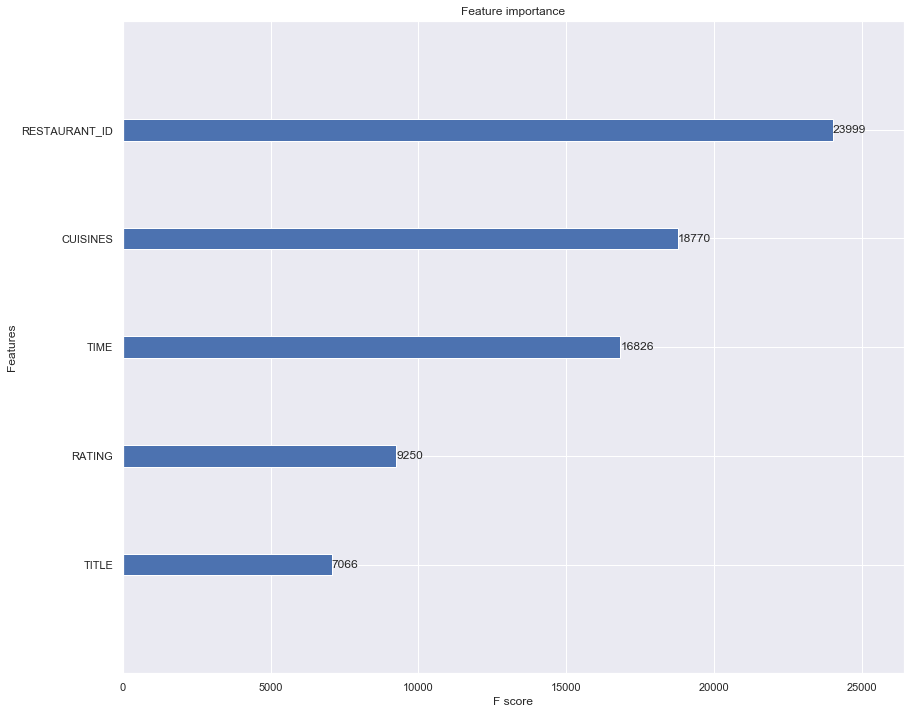

In [12]:

from xgboost import XGBClassifier
from xgboost import plot_importance

# Training the model
model = XGBClassifier()
model_importance = model.fit(X_train, y_train)

# Plotting the Feature importance bar graph
plt.rcParams['figure.figsize'] = [14,12]
sns.set(style = 'darkgrid')
plot_importance(model_importance);

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
import warnings; warnings.simplefilter('ignore')

In [65]:
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix on Test Data


Predicted,100,150,200,250,300,350,400,450,500,550,...,2500,2600,2800,3000,3500,4000,4500,5000,5500,All
True,,,,,,,,,,,,,,,,,,,,,
20,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
100,5,18,12,5,12,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,57
120,0,1,1,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
130,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
150,8,31,38,13,46,5,6,0,4,0,...,0,0,0,0,0,0,0,0,0,153
180,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
200,3,27,67,26,112,12,42,1,18,1,...,0,0,0,0,0,0,0,0,0,317
250,1,7,28,15,77,8,34,0,17,1,...,0,0,0,0,0,0,0,0,0,197


In [30]:

R_forest = RandomForestClassifier(n_estimators = 200)
model_2 = R_forest.fit(X_train, y_train)

# Predictions
pred_2 = model_2.predict(X_test)

print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print ("The f1 score of model 2 : ", f1_score(y_test, pred_2, average = None))

The accuracy of model 2 :  0.1599684791174153
The f1 score of model 2 :  [0.         0.         0.13157895 0.         0.15714286 0.
 0.18209877 0.11594203 0.2587832  0.10852713 0.17693169 0.03821656
 0.20705882 0.         0.14772727 0.02777778 0.16326531 0.02564103
 0.15609756 0.         0.04819277 0.         0.14615385 0.
 0.         0.14084507 0.         0.03703704 0.         0.
 0.15533981 0.         0.06349206 0.         0.         0.
 0.         0.         0.04301075 0.         0.         0.
 0.         0.08333333 0.         0.         0.         0.32
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
